# <center>Annual Leave (AL) Usage Analysis</center>

__<font color=Blue>Background</font>__:   
Owing to Taiwan's labor law amendment effective from the year of 2017, employers are required to cash-out all the un-used Annual Leave (AL) to employees at the end of each year.  
  
__<font color=Blue>Purpose</font>__:   
The purpose of this analysis is to analyze which employee segmentation requires more attention either from senior management team or human resources department.  

__<font color=Blue>Data Source</font>__:   
The analysis is to demonstrated how to leverage Python for such issue. Thus, the source file is created based on dummy data.    
  
__<font color=Blue>Explanation for Variables</font>__:  
    
> 
- _<font color=Navy>Entitlement</font>_: Number of AL days employees are entitled for in the year. The days are granted based on seniority but not in a proportional way. In general, senior employees have more AL days.     
- _<font color=Navy>Remaining</font>_: Number of AL days employees remain un-used at the end of the year.  
- _<font color=Navy>Monthly Salary</font>_: Amount of salary employees are paid every month.   
- _<font color=Navy>Cash-out</font>_: Amount employers are obliged to pay employees for un-used AL days. Formula: <ins>_Remaining * Monthly Salary/ 30_</ins> _(monthly salary is devided by 30 in order to convert it to daily salary)_     
- _<font color=Navy>Ratio</font>_: Ratio of AL usage. Formula: <ins>_(Entitlement - Remaining)/Entitlement_</ins>   
- _<font color=Navy>Years of Service</font>_: Number of years that employees work in the company.   
- _<font color=Navy>YOS</font>_: Employees are devided by each five-year based on their Years of Service and then allocated to different YOS groups.  


## Executive Summary  

Before starting all the paragraphs, let's first jump into the findings we discovered after the whole analysis,    
  
> __1.__   
__<font color='Navy'>Consulting Service Department</font>__ is with the lowest AL usage ratio and the most Cash-out amount. Considering its average entitlement and monthly salary are not the highest among the other departments, the department is relatively not taking equivalent Annual Leave which leads to a huge Cash-out amount.   
  
> __2.__   
__<font color='Navy'>Job Title 'Service Delivery Manager', 'Account Sales Executive' and 'Project Executive'</font>__ have the lowest Annaul Leave usage ratio throughout the whole company. A function is also provided for users to lookup three job titles with the lowest AL usage ratio within one specific department. 
  
> __3.__   
__<font color='Navy'>Years of Service</font>__ is not the decisive factor for cashing-out. Instead, __<font color='Navy'>Job Grade</font>__ is more decisive than Years of Service.      
  
> __4.__   
Employees with higher Job Grade have higher Cash-out amount and lower Annual Leave usage ratio. Thus, they shall be the target if the company wants to ameliorate the  situation.      
      

## Read/ Load Data 
_Let's first read the source file and add some columns when need during the analysis._ 

In [129]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from array import array

data = pd.read_excel('_Source__.xlsx', index_col=0)
data['Worker'] = data['First Name']+' '+data['Last Name']                  # Create a column for full name 
data['Ratio']= (data['Entitlement']-data['Remaining'])/data['Entitlement'] # Calculate Leave Usage Rate - 越高用越多
YOS = pd.cut(data['Years of Service'], 
             bins=[i for i in range(0,40,5)], 
             labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35']) 
data['YOS']= YOS
data['Headcount']= 1
Variable = data.columns.tolist()
variable_list = ['Ratio','Remaining','Cash-out','Entitlement','Monthly Salary']

print('Column names:')
print(Variable)
print()
print('Sample Data:')
data.head()

Column names:
['Last Name', 'First Name', 'Work City', 'Status', 'Employee Group', 'Employee Subgroup', 'Performance Rating', 'Monthly Salary', 'Overtime Eligibility', 'Department', 'Business Unit', 'Job Title', 'Job Grade', 'Gender', 'Years of Service', 'Entitlement', 'Remaining', 'Cash-out', 'Untaken Ratio', 'Worker', 'Ratio', 'YOS', 'Headcount']

Sample Data:


,Last Name,First Name,Work City,Status,Employee Group,Employee Subgroup,Performance Rating,Monthly Salary,Overtime Eligibility,Department,...,Gender,Years of Service,Entitlement,Remaining,Cash-out,Untaken Ratio,Worker,Ratio,YOS,Headcount
Serial No,,,,,,,,,,,,,,,,,,,,,
20331,HSIEH,AARON,City A,Active,Full time,Salaried,3.0,2341,Not Eligible,Operation,...,Female,17.64,24.0,0.0,0.00,0.000000,AARON HSIEH,1.000000,16-20,1
302165,HO,HARVEY,City A,Active,Full time,Salaried,2.0,1929,Not Eligible,R&D,...,Female,6.67,15.0,0.0,0.00,0.000000,HARVEY HO,1.000000,6-10,1
19167,CHANG,OLIVER,City A,Active,Full time,Salaried,2.0,7238,Not Eligible,Operation,...,Female,33.03,30.0,18.5,4463.43,0.616667,OLIVER CHANG,0.383333,31-35,1
77697,CHUANG,LOGAN,City A,Active,Full time,Salaried,3.0,2451,Eligible,Business Service,...,Female,18.38,24.0,0.0,0.00,0.000000,LOGAN CHUANG,1.000000,16-20,1
302315,LIN,EVA,City A,Active,Full time,Salaried,3.0,1647,Eligible,Finance,...,Male,6.39,15.0,0.0,0.00,0.000000,EVA LIN,1.000000,6-10,1


## Summary Table
  
Below is a summary table. It demonstrates average AL usage ratio, total Cash-out amount, total Remaining AL days and number of employees by each department.   

In [118]:
table = data.pivot_table(index=['Department'],
                         values=['Headcount','Ratio','Cash-out','Remaining'],
                         aggfunc={'Ratio':np.mean,'Cash-out':np.sum,'Remaining':np.sum,'Headcount':np.sum}).sort_values(by='Department')
table[['Headcount', 'Ratio', 'Cash-out','Remaining']].copy().sort_values(by='Headcount',ascending=False)

,Headcount,Ratio,Cash-out,Remaining
Department,,,,
Business Service,356,0.409325,546375.68,3011.0
Technology Service,331,0.734399,333279.38,1919.0
R&D,243,0.742637,192948.79,1116.0
Sales,148,0.649538,226438.73,1022.5
Operation,59,0.882781,25115.34,157.0
Finance,27,0.736047,36193.30,177.0
HR,20,0.703312,12295.24,100.5
Marketing,20,0.805477,21912.07,89.5
Online Sales,15,0.676270,12288.33,68.5


## Finding 1 - Consulting Service Department is relatively not taking equivalent Annual Leave. 

We are interested in the differences among different departments.  
  
>
`Ratio_by_BU = data.groupby(['Department']).mean()['Ratio']`  
`Ratio_by_BU = data.groupby(['Department']).mean()['Entitlement']`  
`Ratio_by_BU = data.groupby(['Department']).mean()['Remaining']`  
`Ratio_by_BU = data.groupby(['Department']).mean()['Cash-out']`  
`Ratio_by_BU = data.groupby(['Department']).mean()['Monthly Salary']`    
>

Through above code, it's easy to see that __<font color=Blue>Business Service Department</font>__ <font color=blue>has the lowest AL usage ratio, the most remaining AL days, and the most Cash-out amount</font>.   
  
>  For <ins> Annual Leave usage ratio</ins>, average days of AL Entitlement is not the root cause for this situation as Consulting Service Department is not the one with the most days.    
  
>  For <ins> Cash-out amount</ins>, average Monthly Salary is not the root cause for this situation as Consulting Service Department is not the one with the highest average Monthly Salary.    
  

Therefore, __<font color=Blue>Business Service Department is not taking equivalent AL compared to other departments.</font>__ Sales Department has the similar issue as Business Service Department.   
  
*_Matplotlib.pyplot is introduced to visualize this finding._  
    
  

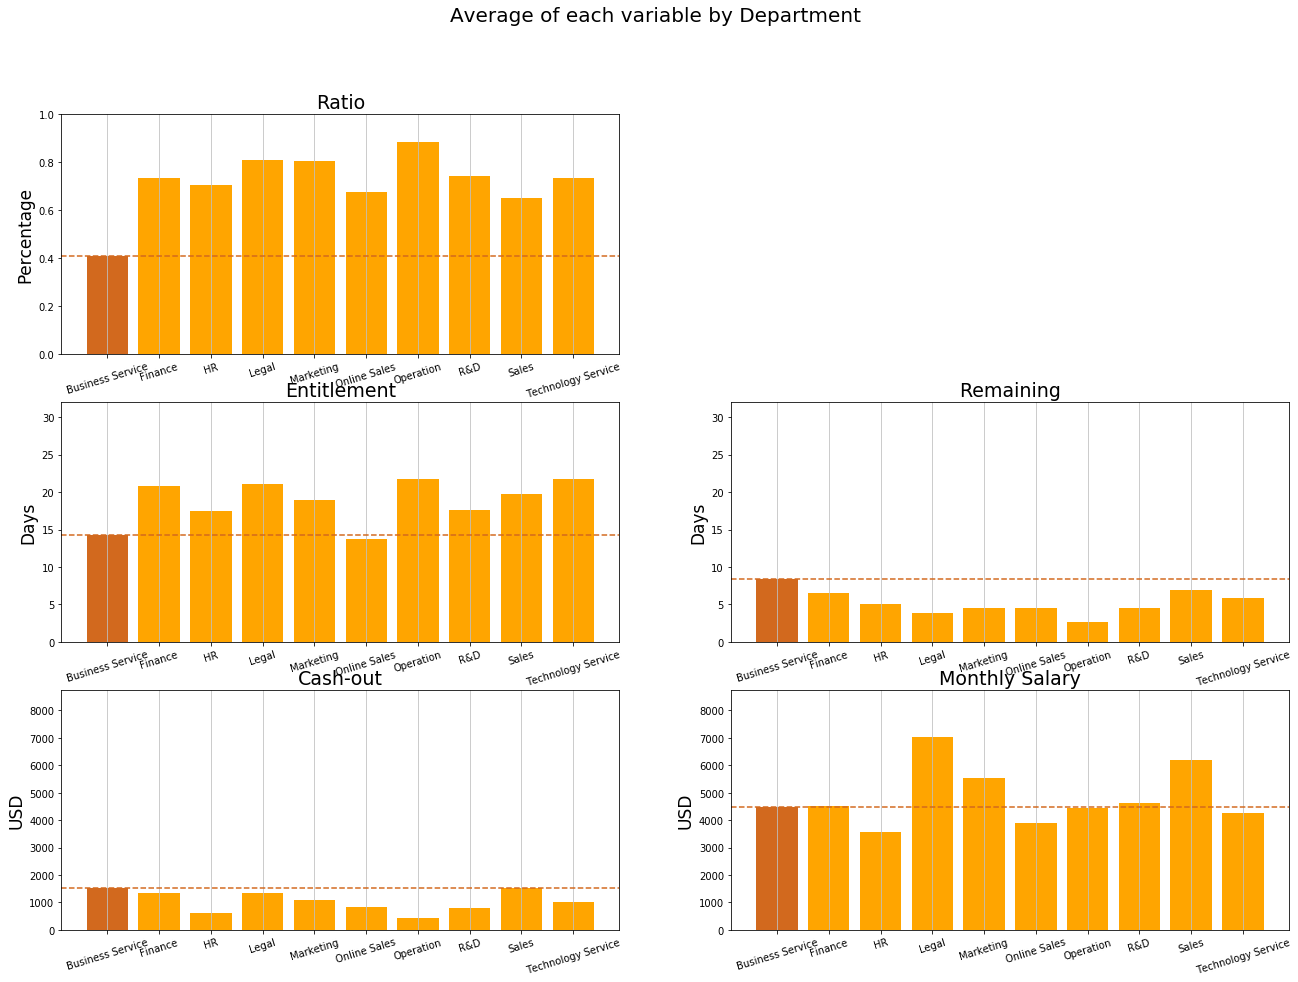

In [119]:
a = [i for i in data['Department'].unique()]
a.sort(reverse=False)    

variable_list_c = ['Ratio','Entitlement','Remaining','Cash-out','Monthly Salary']

b = [i for i in data.groupby(['Department']).mean()['Ratio']]
c = [i for i in data.groupby(['Department']).mean()['Entitlement']]
d = [i for i in data.groupby(['Department']).mean()['Remaining']]
e = [i for i in data.groupby(['Department']).mean()['Cash-out']]
f = [i for i in data.groupby(['Department']).mean()['Monthly Salary']]
    
indices = [b,c,d,e,f]
fig, axes = plt.subplots(3, 2, figsize=(22, 15))
row_indices = [0, 1, 1, 2, 2]
col_indices = [0, 0, 1, 0, 1]
ite_indices = [0, 1]

for indices_i, row_i, col_i, variable_list_i in zip(indices, row_indices, col_indices, variable_list_c):
    axes[row_i, col_i].bar(a,indices_i,color='orange')
    axes[row_i, col_i].bar(a[0],indices_i[0],color='chocolate')
    axes[row_i, col_i].set_xticklabels(a,rotation=17)
    axes[row_i, col_i].set_title(variable_list_i,fontsize=19)
    axes[row_i, col_i].grid(axis='x',color='silver')
    axes[row_i, col_i].set_facecolor('white')
    axes[row_i, col_i].axhline(y=(indices_i[0]), color='chocolate', linestyle='--')
    axes[0,1].set_visible(False)                           

for col_i in ite_indices:
    axes[0,col_i].set_ylim(0,1)
    axes[0,col_i].set_ylabel('Percentage',fontsize=17)
    axes[1,col_i].set_ylim(0,32)
    axes[1,col_i].set_ylabel('Days',fontsize=17)
    axes[2,col_i].set_ylim(0,8750)
    axes[2,col_i].set_ylabel('USD',fontsize=17)
    
plt.suptitle('Average of each variable by Department',fontsize=20)
plt.show()

## Finding 2 - Job Title 'Service Delivery Manager', 'Account Sales Executive' and 'Project Executive' have the lowest AL usage rate
  
We are interested in whether Job Title has an impact on the AL usage ratio.   

> `data.groupby(['Job Title']).mean()['Ratio'].sort_values().dropna().head(3))`  
  
Among the whole company, __<font color=Blue>Service Delivery Manager, Account Sales Executive, Project Executive</font>__ are the three job titles with the lowest AL usage rate.   
   
> `for dept in data['Department'].unique(): 
    print(dept,'-', data[data['Department'] == dept].groupby(['Job Title'])
          .mean()['Ratio'].sort_values().dropna().head(3),'\n')`
   
Three job titles with the lowest AL usage rate in each departments are demonstrated for reference.    
  
  

In [120]:
Job_Title_Rate = data.groupby(['Job Title']).mean()['Ratio'].sort_values().dropna().head(3)
Job_Title_List = []
for i in Job_Title_Rate.index:
    Job_Title_List.append(i)
print(Job_Title_List)

['Technical Staff Professional', 'Service Delivery Manager', 'Internal Auditor / Investigator']


In [121]:
def search_by_dept (dept):
    Job_Title_Rate = data[data['Department'] == dept].groupby(['Job Title']).mean()['Ratio'].sort_values().dropna().head(3)
    Job_Title_List = []

    for i in zip(Job_Title_Rate.index, Job_Title_Rate):
        Job_Title_List.append(i)
        
    return Job_Title_List

print('Please insert the department name which you would like to search:')
name = input()
while search_by_dept(name) == []:
    print('There\'s no data for the mentioned department. It might be caused by inaccurate department name. Please try again:')
    name = input()
search_by_dept(name)

Please insert the department name which you would like to search:


There's no data for the mentioned department. It might be caused by inaccurate department name. Please try again:


There's no data for the mentioned department. It might be caused by inaccurate department name. Please try again:


There's no data for the mentioned department. It might be caused by inaccurate department name. Please try again:


There's no data for the mentioned department. It might be caused by inaccurate department name. Please try again:


 HR


[('Administrator', 0.46436234817813765),
 ('HR Professional', 0.5571428571428572),
 ('HR Administrator', 0.7195767195767195)]

## Finding 3 - Years of Service is not the decisive factor for cashing-out. 
  
Number of AL days are granted to employees based on the Years of Service. Therefore, there is a saying that _<ins>"AL days granted to senior employees are too many. Number of days should be reduced as long as it's unrealistic to ask them to use up all the AL days. Those un-used days are the root cause for the unbearable cash-out amount."</ins>_   

The similar code used to investigate differences among departments is used here. Entitlement increases as Year of Services grows. If excessive AL days is the root cause for the Remaining and Cash-out, AL usage ratio should have a positive correlation with YOS. Yet there is __<font color=blue>no direct relationship between AL usage ratio and YOS</font>__.    
  
Again, calculation formula for Cash-out is _<ins>Remaining * Monthly Salary/ 30</ins>_. Let's further discover the relationship between different variables:   
  
>`data_2.corr()['Remaining'].sort_values(ascending=False).drop_duplicates()`    
>`data_2.corr()['Monthly Salary'].sort_values(ascending=False).drop_duplicates()`    
>`data_2.corr()['Years of Service'].sort_values(ascending=False).drop_duplicates()`    
  
1. <font color=blue>Monthly Salary is positively correlated to Job Grade (0.88)</font>, less positively correlated to Years of Service (0.58).     
2. Years of Service is positively correlated to Entitlement (0.93), less positively correlated to Job Grade (0.53).   
3. <font color=blue>Remaining doesn't have clear relationship with Years of Service (0.31)</font>.    
  
In sum, it's likely that senior employees have higher job grades, which lead to higher salary and higher cash-out amount. Therefore, __<font color=blue>when it comes to reducing the cash-out amount, the company might need to focus more on Job Grade instead of Years of Service.</font>__   
    

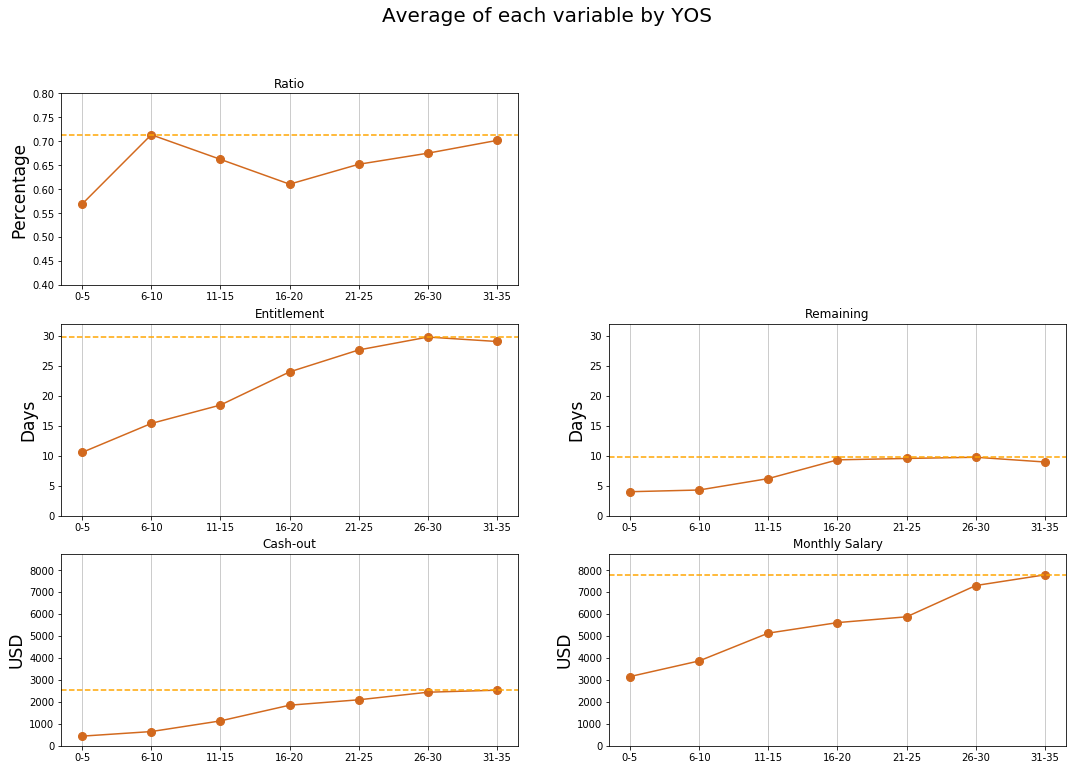

In [122]:
a = [i for i in data['YOS'].unique().dropna().sort_values(ascending=True)]
variable_list_c = ['Ratio','Entitlement','Remaining','Cash-out','Monthly Salary']

b = [i for i in data.groupby(['YOS']).mean()['Ratio']]
c = [i for i in data.groupby(['YOS']).mean()['Entitlement']]
d = [i for i in data.groupby(['YOS']).mean()['Remaining']]
e = [i for i in data.groupby(['YOS']).mean()['Cash-out']]
f = [i for i in data.groupby(['YOS']).mean()['Monthly Salary']]

indices=[b,c,d,e,f]
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
row_indices = [0, 1, 1, 2, 2]
col_indices = [0, 0, 1, 0, 1]
ite_indices = [0,1]

for variable_i,indices_i, row_i, col_i in zip(variable_list_c,indices, row_indices, col_indices):
    axes[row_i, col_i].plot(a,indices_i,'-o',color='chocolate',markerfacecolor='chocolate', markersize=8)
    axes[row_i, col_i].axhline(y=max(indices_i), color='orange', linestyle='--')
    axes[row_i, col_i].grid(axis='x',color='silver')
    axes[row_i, col_i].set_facecolor('white')
    axes[row_i, col_i].set_title(variable_i)
    axes[0,1].set_visible(False) 

for col_i in ite_indices:
    axes[0,col_i].set_ylim(0.4,0.8)
    axes[0,col_i].set_ylabel('Percentage',fontsize=17)
    axes[1,col_i].set_ylim(0,32)
    axes[1,col_i].set_ylabel('Days',fontsize=17)
    axes[2,col_i].set_ylim(0,8750)
    axes[2,col_i].set_ylabel('USD',fontsize=17)

plt.suptitle('Average of each variable by YOS', fontsize=20)
plt.show()

In [123]:
data_2 = data.drop(['Untaken Ratio','Last Name','First Name','Worker','Headcount'],axis=1,inplace=False)
data_2.corr()['Remaining'].sort_values(ascending=False).drop_duplicates()

Remaining             1.000000
Cash-out              0.898337
Monthly Salary        0.344953
Job Grade             0.330640
Entitlement           0.319134
Years of Service      0.310823
Performance Rating   -0.053206
Ratio                -0.821141
Name: Remaining, dtype: float64

In [124]:
data_2.corr()['Monthly Salary'].sort_values(ascending=False).drop_duplicates()

Monthly Salary        1.000000
Job Grade             0.880887
Cash-out              0.586527
Years of Service      0.579512
Entitlement           0.513715
Remaining             0.344953
Ratio                -0.121930
Performance Rating   -0.170505
Name: Monthly Salary, dtype: float64

In [125]:
data_2.corr()['Years of Service'].sort_values(ascending=False).drop_duplicates()

Years of Service      1.000000
Entitlement           0.928767
Monthly Salary        0.579512
Job Grade             0.529677
Cash-out              0.408881
Remaining             0.310823
Ratio                 0.066962
Performance Rating   -0.005340
Name: Years of Service, dtype: float64

In [126]:
data_2.corr()['Cash-out'].sort_values(ascending=False).drop_duplicates()

Cash-out              1.000000
Remaining             0.898337
Monthly Salary        0.586527
Job Grade             0.514163
Years of Service      0.408881
Entitlement           0.397414
Performance Rating   -0.102647
Ratio                -0.654243
Name: Cash-out, dtype: float64

## Finding 4 - Employees with higher Job Grade is not taking equivalent leaves.   
   
The finding 3 discovers that Job Grade is more decisive than Years of Service when it comes to Cash-out amount.   
  
Furthermore, employees with higher Job Grade tend to have lower AL usage ratio. Therefore, since <font color=blue>employees have higher Job Grade tend to have higher Monthly Salary and lower AL usage ratio</font>, if the company would like to ameliorate the current situation, employees with higher Job Grade should be considered as the target group.    
  

In [127]:
table = data.pivot_table(index=['Job Grade'],
                         values=['Headcount','Ratio','Cash-out','Remaining'],
                         aggfunc={'Ratio':np.mean,'Cash-out':np.sum,'Remaining':np.sum,'Headcount':np.sum}).sort_values(by='Job Grade')
table[['Headcount', 'Ratio', 'Remaining','Cash-out']].copy().sort_values(by='Job Grade',ascending=True)

,Headcount,Ratio,Remaining,Cash-out
Job Grade,,,,
1,3,0.514620,25.0,1636.88
2,25,0.874298,46.5,2930.52
3,29,0.976552,17.0,1479.00
4,208,0.594202,765.5,62168.28
5,388,0.681976,1908.0,243404.44
6,373,0.615619,2911.0,535536.56
7,157,0.575723,1529.5,385339.48
8,38,0.556100,418.0,146697.20
9,2,0.501728,27.5,13849.93


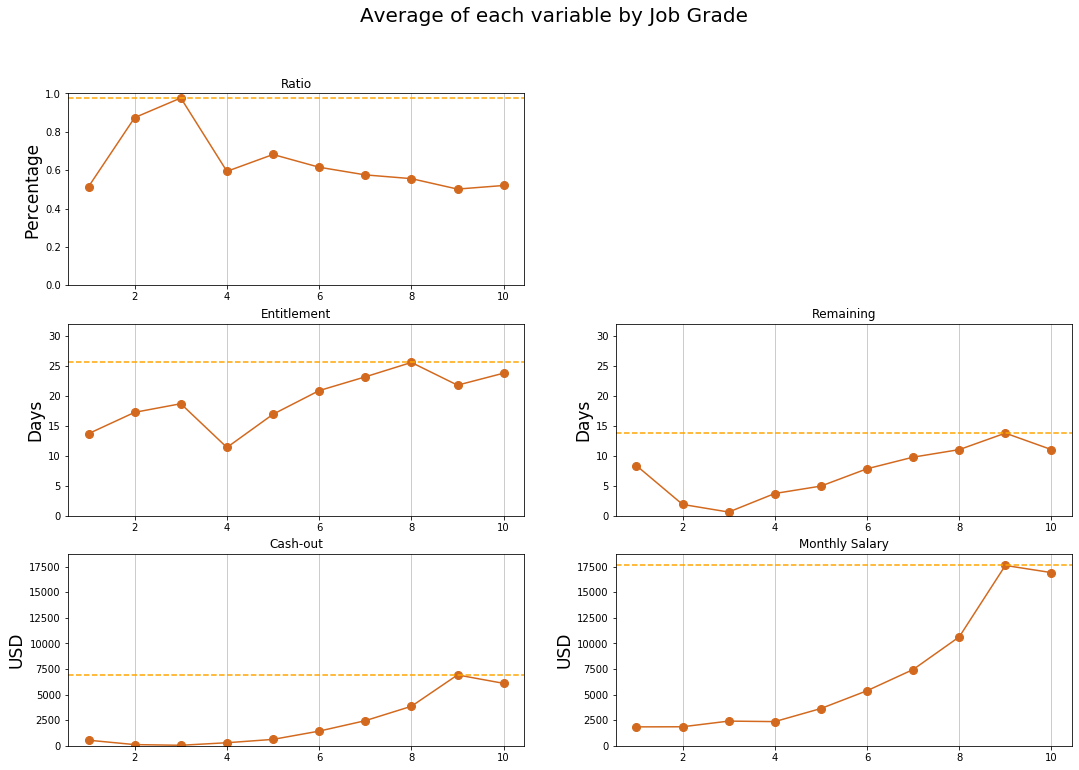

In [128]:
a = [i for i in data['Job Grade'].unique()]
a.sort(reverse=False)    

b = [i for i in data.groupby(['Job Grade']).mean()['Ratio']]
c = [i for i in data.groupby(['Job Grade']).mean()['Entitlement']]
d = [i for i in data.groupby(['Job Grade']).mean()['Remaining']]
e = [i for i in data.groupby(['Job Grade']).mean()['Cash-out']]
f = [i for i in data.groupby(['Job Grade']).mean()['Monthly Salary']]

indices = [b,c,d,e,f]
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
row_indices = [0, 1, 1, 2, 2]
col_indices = [0, 0, 1, 0, 1]
ite_indices = [0,1]

for variable_i,indices_i, row_i, col_i in zip(variable_list_c,indices, row_indices, col_indices):
    axes[row_i, col_i].plot(a,indices_i,'-o',color='chocolate',markerfacecolor='chocolate', markersize=8)
    axes[row_i, col_i].axhline(y=max(indices_i), color='orange', linestyle='--')
    axes[row_i, col_i].grid(axis='x',color='silver')
    axes[row_i, col_i].set_facecolor('white')
    axes[row_i, col_i].set_title(variable_i)
    axes[0,1].set_visible(False) 

for col_i in ite_indices:
    axes[0,col_i].set_ylim(0,1)
    axes[0,col_i].set_ylabel('Percentage',fontsize=17)
    axes[1,col_i].set_ylim(0,32)
    axes[1,col_i].set_ylabel('Days',fontsize=17)
    axes[2,col_i].set_ylim(0,18750)
    axes[2,col_i].set_ylabel('USD',fontsize=17)

plt.suptitle('Average of each variable by Job Grade', fontsize=20)
plt.show()

## Summary  

Let's recap our findings discovered through the analysis, 
  
> __1.__   
__<font color='Navy'>Consulting Service Department</font>__ is with the lowest AL usage ratio and the most Cash-out amount. Considering its average entitlement and monthly salary are not the highest among the other departments, the department is relatively not taking equivalent Annual Leave which leads to a huge Cash-out amount.   
  
> __2.__   
__<font color='Navy'>Job Title 'Service Delivery Manager', 'Account Sales Executive' and 'Project Executive'</font>__ have the lowest Annaul Leave usage ratio throughout the whole company. A function is also provided for users to lookup three job titles with the lowest AL usage ratio within one specific department. 
  
> __3.__   
__<font color='Navy'>Years of Service</font>__ is not the decisive factor for cashing-out. Instead, __<font color='Navy'>Job Grade</font>__ is more decisive than Years of Service.      
  
> __4.__   
Employees with higher Job Grade have higher Cash-out amount and lower Annual Leave usage ratio. Thus, they shall be the target if the company wants to ameliorate the  situation.      
      

<center> ========================= </center>  
<center> End of the Document </center>  
<center> ========================= </center>  
